# Check the odsl and its wind effect from SODA and ROMS compared to Dewi's budgets


ROMS output and SODA reanalysis contain SSH data that is equal to ocean dynamic sea level. 
Ocean dynamics are not observed, but are the output of climate models. 
Still, we try to evaluate the ocean dynamic sea level to observations. 


To do so, Dewi has made two budgets:
- based on six tide gauge stations
- based on aviso altimetry as obtained for a polygonal area around the Dutch coast

I have also obtained the ocean dynamic sea level and its wind effect for those two regions for both ROMS output and SODA reanalysis data.


In [218]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

lowess = sm.nonparametric.lowess


from scipy import signal
from scipy import optimize

path_fig = '/Users/iriskeizer/Documents/ROMS/figures/SODA/analysis/budget'

## Import data

### Import ocean dynamic sea level and its wind effect for the SODA reanalysis and ROMS output data

In [219]:
path = '/Users/iriskeizer/Documents/ROMS/data/wind effect'

odsl_roms_tg = pd.read_csv(f'{path}/sealevel_roms_tg.csv', index_col = 'time')
odsl_soda_tg = pd.read_csv(f'{path}/sealevel_soda_tg.csv', index_col = 'time')
odsl_roms_poly = pd.read_csv(f'{path}/sealevel_roms_poly.csv', index_col = 'time').loc[1993:2019]
odsl_soda_poly = pd.read_csv(f'{path}/sealevel_soda_poly.csv', index_col = 'time').loc[1993:2019]

wind_roms_tg = pd.read_csv(f'{path}/timeseries_roms_tg.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)
wind_soda_tg = pd.read_csv(f'{path}/timeseries_soda_tg.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)
wind_roms_poly = pd.read_csv(f'{path}/timeseries_roms_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1).loc[1993:2019]
wind_soda_poly = pd.read_csv(f'{path}/timeseries_soda_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1).loc[1993:2019]



In [220]:
# Obtain anomalies wrt 1993

odsl_roms_poly = odsl_roms_poly - odsl_roms_poly.loc[1993]
odsl_soda_poly = odsl_soda_poly - odsl_soda_poly.loc[1993]

wind_roms_poly = wind_roms_poly - wind_roms_poly.loc[1993]
wind_soda_poly = wind_soda_poly - wind_soda_poly.loc[1993]

### Import budgets obtained by Dewi

In [221]:
budget_poly = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/budget/slbudget_2022_12_01_NL_region_altimetry_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv', index_col = 'time')

In [222]:
odsl_budget_poly = budget_poly['LocSteric'] + budget_poly['Wind']
wind_budget_poly = budget_poly['Wind']

### Obtain local steric 

In [223]:
locster_budget_poly = budget_poly['LocSteric'] 
locster_roms_poly = odsl_roms_poly['Average'] - wind_roms_poly['Wind effect']
locster_soda_poly = odsl_soda_poly['Average'] - wind_soda_poly['Wind effect']

## Plot data

#### Plot ocean dynamic sea level and obtain correlations for non-detrended time series

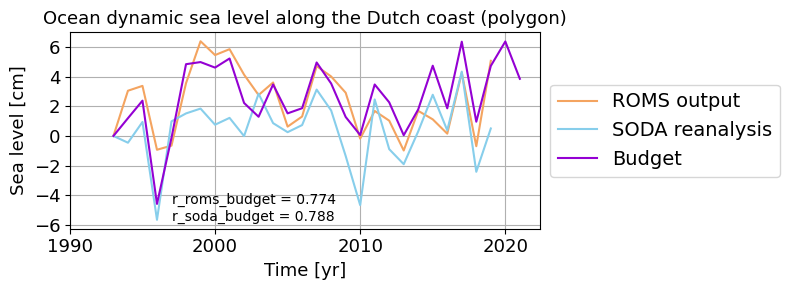

In [224]:
plt.figure(figsize = (8,3))
     
plt.plot(odsl_roms_poly.index.values, odsl_roms_poly['Average'].values*100, color='sandybrown')
plt.plot(odsl_soda_poly.index.values, odsl_soda_poly['Average'].values*100, color='skyblue')
plt.plot(odsl_budget_poly.index.values, odsl_budget_poly.values, color='darkviolet')
       

# Obtain correlations
r_soda_budget = np.round(np.corrcoef(odsl_soda_poly['Average'].loc[1993:2019].values*100, odsl_budget_poly.loc[1993:2019].values)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(odsl_roms_poly['Average'].loc[1993:2019].values*100, odsl_budget_poly.loc[1993:2019].values)[0,1], 3)  

plt.text(1997, -4.6, f'r_roms_budget = {r_roms_budget}')
plt.text(1997, -5.7, f'r_soda_budget = {r_soda_budget}')
    
    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Ocean dynamic sea level along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()
    
plt.savefig(f'{path_fig}/ocdyn_sealevel', bbox_inches="tight")

#### Plot wind-driven sea level and obtain correlations for non-detrended time series

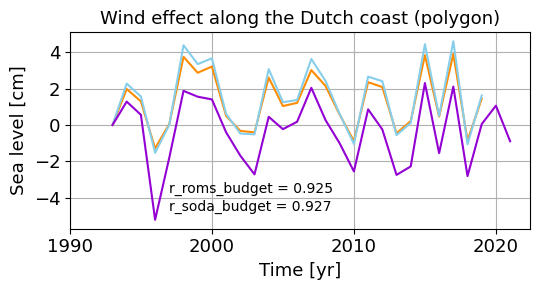

In [225]:
plt.figure(figsize = (5.5,3))
     
plt.plot(wind_roms_poly.index.values, wind_roms_poly['Wind effect'].values*100, color='darkorange')
plt.plot(wind_soda_poly.index.values, wind_soda_poly['Wind effect'].values*100, color='skyblue')
plt.plot(wind_budget_poly.index.values, wind_budget_poly.values, color='darkviolet')


# Obtain correlations
r_soda_budget = np.round(np.corrcoef(wind_soda_poly['Wind effect'].loc[1993:2019].values*100, wind_budget_poly.loc[1993:2019].values)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(wind_roms_poly['Wind effect'].loc[1993:2019].values*100, wind_budget_poly.loc[1993:2019].values)[0,1], 3)  

plt.text(1997, -3.7, f'r_roms_budget = {r_roms_budget}')
plt.text(1997, -4.7, f'r_soda_budget = {r_soda_budget}')

    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Wind effect along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/wind_effect', bbox_inches="tight")

#### Plot local steric sea level and obtain correlations for non-detrended time series

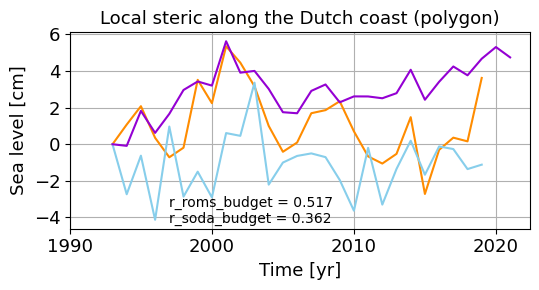

In [226]:
plt.figure(figsize = (5.5,3))
     
plt.plot(locster_roms_poly.index.values, locster_roms_poly.values*100, color='darkorange')
plt.plot(locster_soda_poly.index.values, locster_soda_poly.values*100, color='skyblue')
plt.plot(locster_budget_poly.index.values, locster_budget_poly.values, color='darkviolet')


# Obtain correlations
r_soda_budget = np.round(np.corrcoef(locster_soda_poly.loc[1993:2019].values*100, locster_budget_poly.loc[1993:2019].values)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(locster_roms_poly.loc[1993:2019].values*100, locster_budget_poly.loc[1993:2019].values)[0,1], 3)  

plt.text(1997, -3.4, f'r_roms_budget = {r_roms_budget}')
plt.text(1997, -4.3, f'r_soda_budget = {r_soda_budget}')

    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Local steric along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/local_steric', bbox_inches="tight")

#### Plot ocean dynamic sea level and obtain correlations for detrended time series

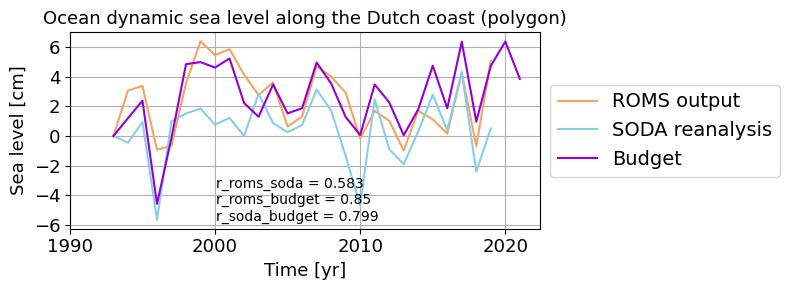

In [227]:
plt.figure(figsize = (8,3))
     
plt.plot(odsl_roms_poly.index.values, odsl_roms_poly['Average'].values*100, color='sandybrown')
plt.plot(odsl_soda_poly.index.values, odsl_soda_poly['Average'].values*100, color='skyblue')
plt.plot(odsl_budget_poly.index.values, odsl_budget_poly.values, color='darkviolet')

soda_dt = signal.detrend(odsl_soda_poly['Average'].loc[1993:2019]*100)
roms_dt = signal.detrend(odsl_roms_poly['Average'].loc[1993:2019]*100)
budget_dt = signal.detrend(odsl_budget_poly.loc[1993:2019])



# Obtain correlations
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(roms_dt, budget_dt)[0,1], 3)  
r_roms_soda = np.round(np.corrcoef(roms_dt, soda_dt)[0,1], 3)  

plt.text(2000.1, -3.5, f'r_roms_soda = {r_roms_soda}')
plt.text(2000.1, -4.6, f'r_roms_budget = {r_roms_budget}')
plt.text(2000.1, -5.7, f'r_soda_budget = {r_soda_budget}')
    
    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Ocean dynamic sea level along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()
    
plt.savefig(f'{path_fig}/ocdyn_sealevel', bbox_inches="tight")

In [228]:
np.polyfit(odsl_roms_poly.index.values, odsl_roms_poly['Average'], 1)[0]

-0.0004168983414626716

In [229]:
np.polyfit(odsl_soda_poly.index.values, odsl_soda_poly['Average'], 1)[0]

0.00018679802369032461

In [230]:
np.polyfit(odsl_budget_poly.index.values, odsl_budget_poly.values, 1)[0]

0.09634013796477349

In [231]:
odsl_roms_poly['Average'].std()

0.022442354279199793

In [232]:
odsl_soda_poly['Average'].std()

0.022114907744888383

In [233]:
odsl_budget_poly.std()

2.380636640604685

#### Plot wind-driven sea level and obtain correlations for detrended time series

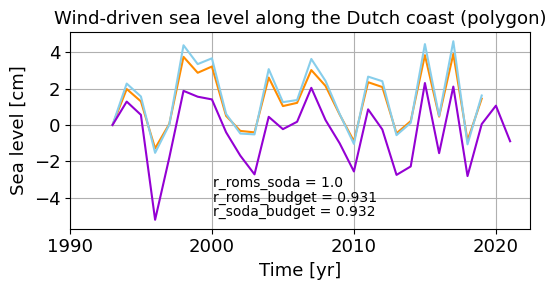

In [189]:
plt.figure(figsize = (5.5,3))
     
plt.plot(wind_roms_poly.index.values, wind_roms_poly['Wind effect'].values*100, color='darkorange')
plt.plot(wind_soda_poly.index.values, wind_soda_poly['Wind effect'].values*100, color='skyblue')
plt.plot(wind_budget_poly.index.values, wind_budget_poly.values, color='darkviolet')

soda_dt = signal.detrend(wind_soda_poly['Wind effect'].loc[1993:2019]*100)
roms_dt = signal.detrend(wind_roms_poly['Wind effect'].loc[1993:2019]*100)
budget_dt = signal.detrend(wind_budget_poly.loc[1993:2019])

# Obtain correlations
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(roms_dt, budget_dt)[0,1], 3)  
r_roms_soda = np.round(np.corrcoef(roms_dt, soda_dt)[0,1], 3)  


plt.text(2000.1, -3.4, f'r_roms_soda = {r_roms_soda}')
plt.text(2000.1, -4.2, f'r_roms_budget = {r_roms_budget}')
plt.text(2000.1, -5.0, f'r_soda_budget = {r_soda_budget}')

    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Wind-driven sea level along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/wind_effect', bbox_inches="tight")

In [237]:
np.polyfit(wind_roms_poly.index.values, wind_roms_poly['Wind effect'], 1)[0]

0.00010763749160290075

In [238]:
np.polyfit(wind_soda_poly.index.values, wind_soda_poly['Wind effect'], 1)[0]

0.00010951174817655816

In [239]:
np.polyfit(wind_budget_poly.index.values, wind_budget_poly, 1)[0]

-0.004773169200582005

In [240]:
wind_roms_poly['Wind effect'].std()

0.015679496547775805

In [241]:
wind_soda_poly['Wind effect'].std()

0.018464559653580924

In [242]:
wind_budget_poly.std()

1.8377754387357812

#### Plot local steric sea level and obtain correlations for detrended time series

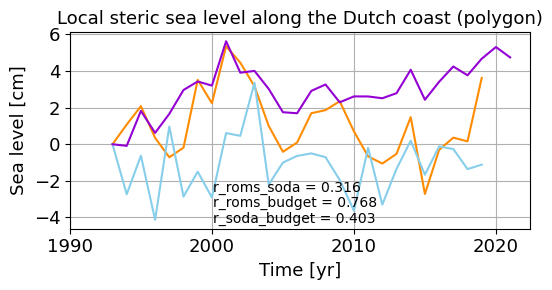

In [190]:
plt.figure(figsize = (5.5,3))
     
plt.plot(locster_roms_poly.index.values, locster_roms_poly.values*100, color='darkorange')
plt.plot(locster_soda_poly.index.values, locster_soda_poly.values*100, color='skyblue')
plt.plot(locster_budget_poly.index.values, locster_budget_poly.values, color='darkviolet')

soda_dt = signal.detrend(locster_soda_poly.loc[1993:2019]*100)
roms_dt = signal.detrend(locster_roms_poly.loc[1993:2019]*100)
budget_dt = signal.detrend(locster_budget_poly.loc[1993:2019])

# Obtain correlations
r_soda_budget = np.round(np.corrcoef(soda_dt, budget_dt)[0,1], 3)
r_roms_budget = np.round(np.corrcoef(roms_dt, budget_dt)[0,1], 3)  
r_roms_soda = np.round(np.corrcoef(roms_dt, soda_dt)[0,1], 3)  


plt.text(2000.1, -2.6, f'r_roms_soda = {r_roms_soda}')
plt.text(2000.1, -3.4, f'r_roms_budget = {r_roms_budget}')
plt.text(2000.1, -4.3, f'r_soda_budget = {r_soda_budget}')

    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Local steric sea level along the Dutch coast (polygon)', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()

labels=['ROMS output','SODA reanalysis', 'Budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/local_steric', bbox_inches="tight")

In [245]:
np.polyfit(locster_roms_poly.index.values, locster_roms_poly, 1)[0]

-0.0005245358330655727

In [246]:
np.polyfit(locster_soda_poly.index.values, locster_soda_poly, 1)[0]

7.728627551376635e-05

In [247]:
np.polyfit(locster_budget_poly.index.values, locster_budget_poly.values, 1)[0]

0.10111330716535548

In [249]:
locster_roms_poly.std()

0.01853109645246293

In [250]:
locster_soda_poly.std()

0.016156859135759163

In [251]:
locster_budget_poly.std()

1.4097222328187309

#### Plot observations and budget with ocean dyn sea level replaced and obtain correlations for detrended time series

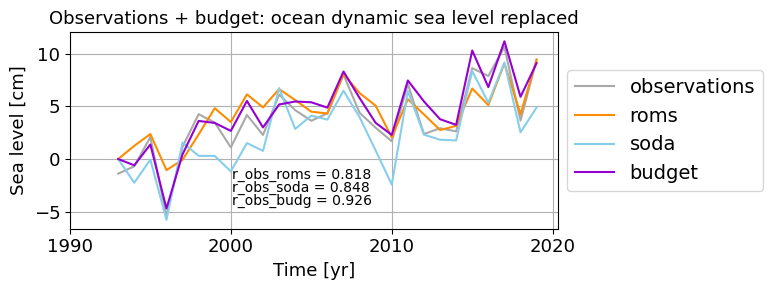

In [191]:
# Obtain total budget
roms = budget_poly['Total'].loc[1993:2019] - odsl_budget_poly.loc[1993:2019] + odsl_roms_poly['Average'].loc[1993:2019]*100
soda = budget_poly['Total'].loc[1993:2019] - odsl_budget_poly.loc[1993:2019] + odsl_soda_poly['Average'].loc[1993:2019]*100
budget = budget_poly['Total'].loc[1993:2019]


plt.figure(figsize = (8,3))

plt.plot(budget_poly.loc[1993:2019].index.values, budget_poly['Obs'].loc[1993:2019].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budget_poly['Obs'].loc[1993:2019])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2000.1, -1.9, f'r_obs_roms = {r_roms}')
plt.text(2000.1, -3.1, f'r_obs_soda = {r_soda}')
plt.text(2000.1, -4.4, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations + budget: ocean dynamic sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_ocdynsl', bbox_inches="tight")

#### Plot observations and budget with locster sea level replaced and obtain correlations for detrended time series

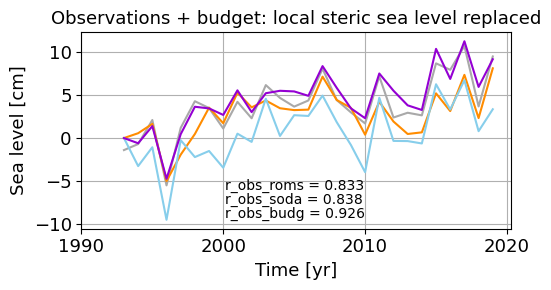

In [192]:
# Obtain total budget
roms = budget_poly['Total'].loc[1993:2019] - locster_budget_poly.loc[1993:2019] + locster_roms_poly.loc[1993:2019]*100
soda = budget_poly['Total'].loc[1993:2019] - locster_budget_poly.loc[1993:2019] + locster_soda_poly.loc[1993:2019]*100
budget = budget_poly['Total'].loc[1993:2019]


plt.figure(figsize = (5.5,3))

plt.plot(budget_poly.loc[1993:2019].index.values, budget_poly['Obs'].loc[1993:2019].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budget_poly['Obs'].loc[1993:2019])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2000.1, -6, f'r_obs_roms = {r_roms}')
plt.text(2000.1, -7.6, f'r_obs_soda = {r_soda}')
plt.text(2000.1, -9.2, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations + budget: local steric sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_locster', bbox_inches="tight")

#### Plot observations and budget with wind-driven sea level replaced and obtain correlations for detrended time series

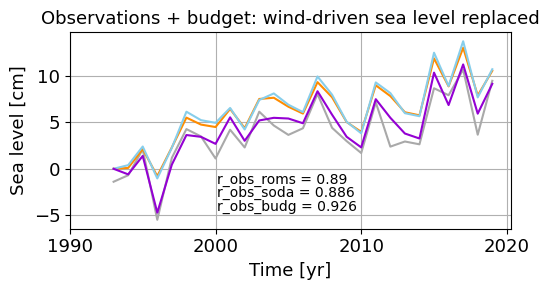

In [193]:
# Obtain total budget
roms = budget_poly['Total'].loc[1993:2019] - wind_budget_poly.loc[1993:2019] + wind_roms_poly['Wind effect'].loc[1993:2019]*100
soda = budget_poly['Total'].loc[1993:2019] - wind_budget_poly.loc[1993:2019] + wind_soda_poly['Wind effect'].loc[1993:2019]*100
budget = budget_poly['Total'].loc[1993:2019]


plt.figure(figsize = (5.5,3))

plt.plot(budget_poly.loc[1993:2019].index.values, budget_poly['Obs'].loc[1993:2019].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budget_poly['Obs'].loc[1993:2019])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2000.1, -1.6, f'r_obs_roms = {r_roms}')
plt.text(2000.1, -3.0, f'r_obs_soda = {r_soda}')
plt.text(2000.1, -4.5, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations + budget: wind-driven sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_windeffect', bbox_inches="tight")

In [194]:
odsl_roms_poly = pd.read_csv(f'{path}/sealevel_roms_poly.csv', index_col = 'time')
odsl_soda_poly = pd.read_csv(f'{path}/sealevel_soda_poly.csv', index_col = 'time')

wind_roms_poly = pd.read_csv(f'{path}/timeseries_roms_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)
wind_soda_poly = pd.read_csv(f'{path}/timeseries_soda_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)

locster_roms_poly = odsl_roms_poly['Average'] - wind_roms_poly['Wind effect']
locster_soda_poly = odsl_soda_poly['Average'] - wind_soda_poly['Wind effect']

locster_diff_soda = locster_roms_poly.loc[1980:2019]*100 - locster_soda_poly.loc[1980:2019]*100
locster_diff_budg = locster_roms_poly.loc[1993:2019]*100 - locster_budget_poly.loc[1993:2019]

In [195]:
def series_smooth(df, name, window):
    '''
    Function to smooth a series and returns a dataframe
    df should be the series that has to be smoothed
    name should be the name of the column of returned dataframe
    window is the smoothing window
    '''
    df_lo = pd.DataFrame(index=pd.Series(df.index.values, name="time"))
    
    
    frac = window/df.values.size
    df_lo[name] = lowess(df.values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo

locster_diff_soda_smooth = series_smooth(locster_diff_soda, 'LocSteric', 5)
locster_diff_budg_smooth = series_smooth(locster_diff_budg, 'LocSteric', 5)


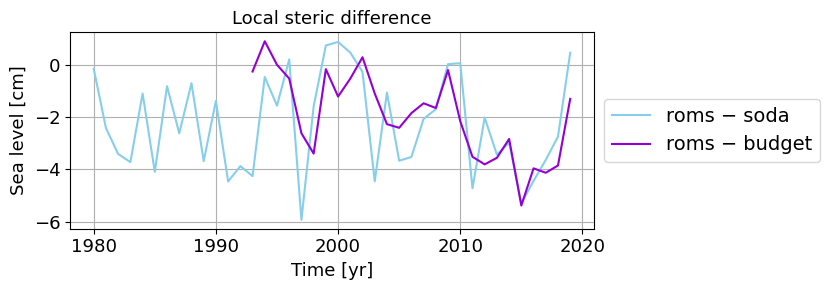

In [196]:
plt.figure(figsize = (8.4,3))
     
plt.plot(locster_diff_soda.index.values, locster_diff_soda.values, color='skyblue')
plt.plot(locster_diff_budg.index.values, locster_diff_budg.values, color='darkviolet')



    
plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Local steric difference', fontsize = 13)
plt.xticks(range(1980, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()


labels=['roms − soda','roms − budget']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/local_steric_diff', bbox_inches="tight")

### Create detrended plot with sine function fitted from 1993 to 1990

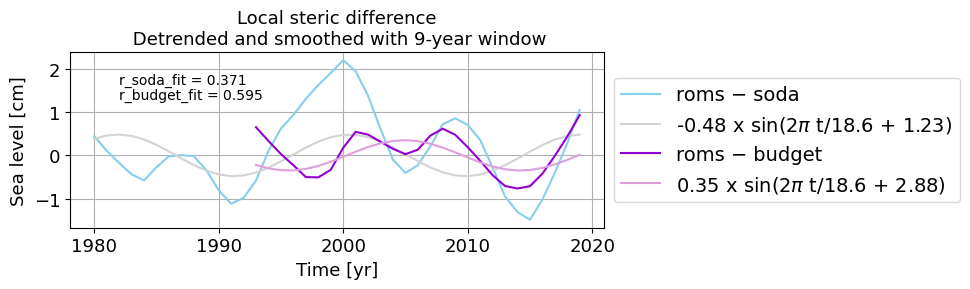

In [197]:
locster_diff_soda = locster_roms_poly.loc[1980:2019]*100 - locster_soda_poly.loc[1980:2019]*100
locster_diff_budg = locster_roms_poly.loc[1993:2019]*100 - locster_budget_poly.loc[1993:2019]


locster_diff_soda_dt = pd.DataFrame(index=pd.Series(locster_diff_soda.index.values, name="time"))
locster_diff_budg_dt = pd.DataFrame(index=pd.Series(locster_diff_budg.index.values, name="time"))

locster_diff_soda_dt['LocSteric'] = signal.detrend(locster_diff_soda)
locster_diff_budg_dt['LocSteric'] = signal.detrend(locster_diff_budg)


def df_smooth(df, name, window):
    '''
    Function to smooth a series and returns a dataframe
    df should be the series that has to be smoothed
    name should be the name of the column of returned dataframe
    window is the smoothing window
    '''
    df_lo = pd.DataFrame(index=pd.Series(df.index.values, name="time"))
    
    
    frac = window/df.values.size
    df_lo[name] = lowess(df[name].values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo

window = 9
locster_diff_soda_dt_smooth = df_smooth(locster_diff_soda_dt, 'LocSteric', window)
locster_diff_budg_dt_smooth = df_smooth(locster_diff_budg_dt, 'LocSteric', window)



def sin_func(x, a, b):
    return a * np.sin(2*np.pi/18.6 * x + b)

params_soda, params_covariance_soda = optimize.curve_fit(sin_func, locster_diff_soda_dt_smooth.index.values, 
                                                         locster_diff_soda_dt_smooth['LocSteric'].values, 
                                                         p0=[2, 2])
params_budg, params_covariance_budg = optimize.curve_fit(sin_func, locster_diff_budg_dt_smooth.index.values, 
                                                         locster_diff_budg_dt_smooth['LocSteric'].values, 
                                                         p0=[2, 2])


plt.figure(figsize = (9.8,3))

plt.plot(locster_diff_soda_dt_smooth.index.values, locster_diff_soda_dt_smooth['LocSteric'].values, color='skyblue')
plt.plot(locster_diff_soda_dt_smooth.index.values, sin_func(locster_diff_soda_dt_smooth.index.values, params_soda[0], params_soda[1]), color = 'lightgray')
plt.plot(locster_diff_budg_dt_smooth.index.values, locster_diff_budg_dt_smooth['LocSteric'].values, color='darkviolet')
plt.plot(locster_diff_budg_dt_smooth.index.values, sin_func(locster_diff_budg_dt_smooth.index.values, params_budg[0], params_budg[1]), color = 'plum')


# Obtain correlations
r_soda = np.round(np.corrcoef(locster_diff_soda_dt_smooth['LocSteric'].values, sin_func(locster_diff_soda_dt_smooth.index.values, params_soda[0], params_soda[1]))[0,1], 3)
r_budg = np.round(np.corrcoef(locster_diff_budg_dt_smooth['LocSteric'].values, sin_func(locster_diff_budg_dt_smooth.index.values, params_budg[0], params_budg[1]))[0,1], 3)

plt.text(1982, 1.65, f'r_soda_fit = {r_soda}')
plt.text(1982, 1.3, f'r_budget_fit = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Local steric difference\n Detrended and smoothed with {window}-year window', fontsize = 13)
plt.xticks(range(1980, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['roms − soda', f'{round(params_soda[0],2)} x sin($2\pi$ t/18.6 + {round(params_soda[1],2)})',
        'roms − budget', f'{round(params_budg[0],2)} x sin($2\pi$ t/18.6 + {round(params_budg[1],2)})']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/local_steric_diff_detrended_sine_fit', bbox_inches="tight")

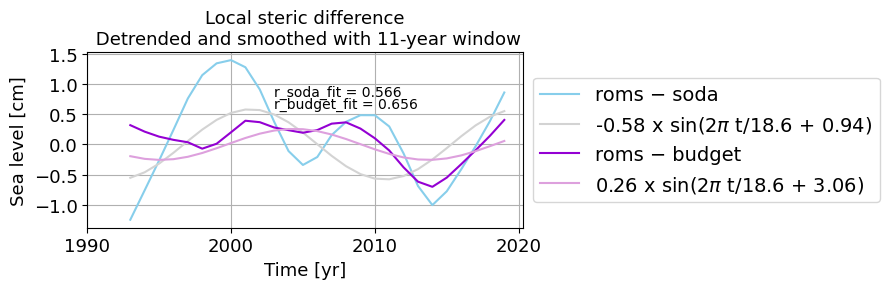

In [198]:
locster_diff_soda = locster_roms_poly.loc[1993:2019]*100 - locster_soda_poly.loc[1993:2019]*100
locster_diff_budg = locster_roms_poly.loc[1993:2019]*100 - locster_budget_poly.loc[1993:2019]


locster_diff_soda_dt = pd.DataFrame(index=pd.Series(locster_diff_soda.index.values, name="time"))
locster_diff_budg_dt = pd.DataFrame(index=pd.Series(locster_diff_budg.index.values, name="time"))

locster_diff_soda_dt['LocSteric'] = signal.detrend(locster_diff_soda)
locster_diff_budg_dt['LocSteric'] = signal.detrend(locster_diff_budg)


def df_smooth(df, name, window):
    '''
    Function to smooth a series and returns a dataframe
    df should be the series that has to be smoothed
    name should be the name of the column of returned dataframe
    window is the smoothing window
    '''
    df_lo = pd.DataFrame(index=pd.Series(df.index.values, name="time"))
    
    
    frac = window/df.values.size
    df_lo[name] = lowess(df[name].values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo

window = 11
locster_diff_soda_dt_smooth = df_smooth(locster_diff_soda_dt, 'LocSteric', window)
locster_diff_budg_dt_smooth = df_smooth(locster_diff_budg_dt, 'LocSteric', window)



def sin_func(x, a, b):
    return a * np.sin(2*np.pi/18.6 * x + b)

params_soda, params_covariance_soda = optimize.curve_fit(sin_func, locster_diff_soda_dt_smooth.index.values, 
                                                         locster_diff_soda_dt_smooth['LocSteric'].values, 
                                                         p0=[2, 2])
params_budg, params_covariance_budg = optimize.curve_fit(sin_func, locster_diff_budg_dt_smooth.index.values, 
                                                         locster_diff_budg_dt_smooth['LocSteric'].values, 
                                                         p0=[2, 2])


plt.figure(figsize = (9,3))

plt.plot(locster_diff_soda_dt_smooth.index.values, locster_diff_soda_dt_smooth['LocSteric'].values, color='skyblue')
plt.plot(locster_diff_soda_dt_smooth.index.values, sin_func(locster_diff_soda_dt_smooth.index.values, params_soda[0], params_soda[1]), color = 'lightgray')
plt.plot(locster_diff_budg_dt_smooth.index.values, locster_diff_budg_dt_smooth['LocSteric'].values, color='darkviolet')
plt.plot(locster_diff_budg_dt_smooth.index.values, sin_func(locster_diff_budg_dt_smooth.index.values, params_budg[0], params_budg[1]), color = 'plum')

# Obtain correlations
r_soda = np.round(np.corrcoef(locster_diff_soda_dt_smooth['LocSteric'].values, sin_func(locster_diff_soda_dt_smooth.index.values, params_soda[0], params_soda[1]))[0,1], 3)
r_budg = np.round(np.corrcoef(locster_diff_budg_dt_smooth['LocSteric'].values, sin_func(locster_diff_budg_dt_smooth.index.values, params_budg[0], params_budg[1]))[0,1], 3)

plt.text(2003, 0.8, f'r_soda_fit = {r_soda}')
plt.text(2003, 0.6, f'r_budget_fit = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Local steric difference\n Detrended and smoothed with {window}-year window', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['roms − soda', f'{round(params_soda[0],2)} x sin($2\pi$ t/18.6 + {round(params_soda[1],2)})',
        'roms − budget', f'{round(params_budg[0],2)} x sin($2\pi$ t/18.6 + {round(params_budg[1],2)})']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/local_steric_diff_detrended_sine_fit_1993', bbox_inches="tight")

## Replace ocean dynamic, local steric and wind influenced sea level in budget

## Import data

### Import ocean dynamic sea level and its wind effect for the SODA reanalysis and ROMS output data

In [199]:
path = '/Users/iriskeizer/Documents/ROMS/data/wind effect'

odsl_roms_tg = pd.read_csv(f'{path}/sealevel_roms_tg.csv', index_col = 'time')
odsl_soda_tg = pd.read_csv(f'{path}/sealevel_soda_tg.csv', index_col = 'time')
odsl_roms_poly = pd.read_csv(f'{path}/sealevel_roms_poly.csv', index_col = 'time').loc[1993:2019]
odsl_soda_poly = pd.read_csv(f'{path}/sealevel_soda_poly.csv', index_col = 'time').loc[1993:2019]

wind_roms_tg = pd.read_csv(f'{path}/timeseries_roms_tg.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)*100
wind_soda_tg = pd.read_csv(f'{path}/timeseries_soda_tg.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1)*100
wind_roms_poly = pd.read_csv(f'{path}/timeseries_roms_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1).loc[1993:2019]*100
wind_soda_poly = pd.read_csv(f'{path}/timeseries_soda_poly.csv', index_col = 'time').drop(['$U \sqrt{u^2+v^2}$', '$V \sqrt{u^2+v^2}$', 'trend', 'total'], axis = 1).rename({'wind total': 'Wind effect'}, axis = 1).loc[1993:2019]*100



In [200]:
# Obtain anomalies wrt 1993

odsl_roms_poly = odsl_roms_poly - odsl_roms_poly.loc[1993]
odsl_soda_poly = odsl_soda_poly - odsl_soda_poly.loc[1993]

wind_roms_poly = wind_roms_poly - wind_roms_poly.loc[1993]
wind_soda_poly = wind_soda_poly - wind_soda_poly.loc[1993]

### Import budgets obtained by Dewi

In [201]:
budg_poly = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/budget/slbudget_2022_11_23_NL_region_altimetry_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv', index_col = 'time').loc[1993:2019]

In [202]:
odsl_budg_poly = budg_poly['LocSteric'] + budg_poly['Wind']
wind_budg_poly = budg_poly['Wind']

### Obtain local steric 

In [203]:
locster_budg_poly = budg_poly['LocSteric'] 
locster_roms_poly = odsl_roms_poly['Average'] - wind_roms_poly['Wind effect']
locster_soda_poly = odsl_soda_poly['Average'] - wind_soda_poly['Wind effect']

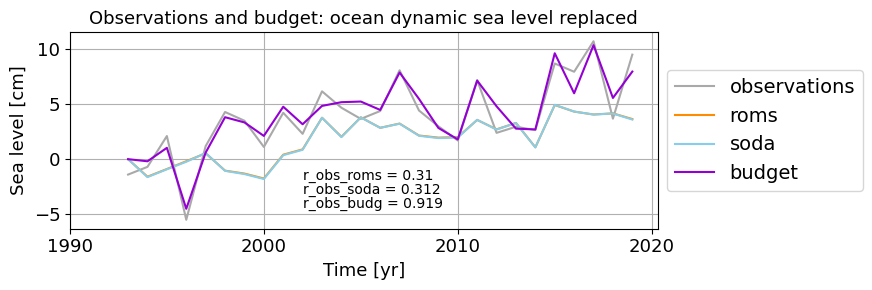

In [204]:
# Obtain total budget
roms = budg_poly['Total'] - odsl_budg_poly + odsl_roms_poly['Average']
soda = budg_poly['Total'] - odsl_budg_poly + odsl_soda_poly['Average']
budget = budg_poly['Total']


plt.figure(figsize = (9,3))

plt.plot(budg_poly.index.values, budg_poly['Obs'].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budg_poly['Obs'])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2002, -1.9, f'r_obs_roms = {r_roms}')
plt.text(2002, -3.1, f'r_obs_soda = {r_soda}')
plt.text(2002, -4.4, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations and budget: ocean dynamic sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_ocdynsl', bbox_inches="tight")

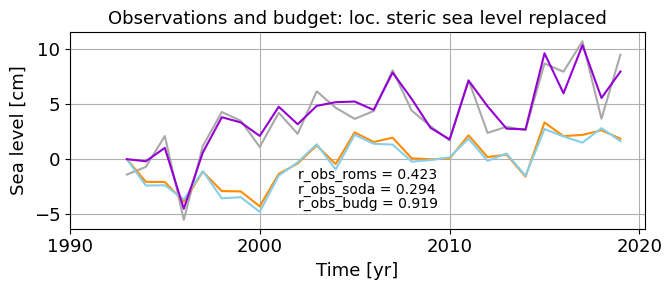

In [205]:
# Obtain total budget
roms = budg_poly['Total'] - locster_budg_poly + locster_roms_poly
soda = budg_poly['Total'] - locster_budg_poly + locster_soda_poly
budget = budg_poly['Total'] - locster_budg_poly + locster_budg_poly


plt.figure(figsize = (7,3))

plt.plot(budg_poly.index.values, budg_poly['Obs'].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budg_poly['Obs'])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2002, -1.8, f'r_obs_roms = {r_roms}')
plt.text(2002, -3.1, f'r_obs_soda = {r_soda}')
plt.text(2002, -4.4, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations and budget: loc. steric sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_locster', bbox_inches="tight")

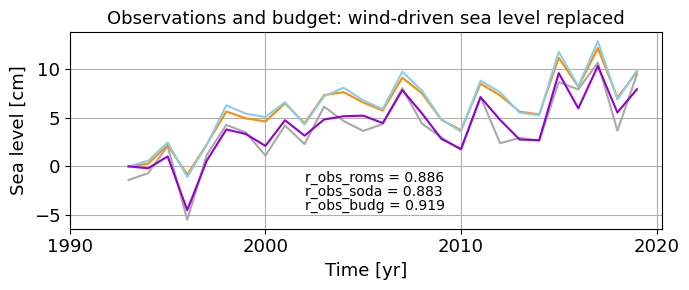

In [206]:
# Obtain total budget
roms = budg_poly['Total'] - wind_budg_poly + wind_roms_poly['Wind effect']
soda = budg_poly['Total'] - wind_budg_poly + wind_soda_poly['Wind effect']
budget = budg_poly['Total']


plt.figure(figsize = (7,3))

plt.plot(budg_poly.index.values, budg_poly['Obs'].values, color='darkgray')
plt.plot(roms.index.values, roms.values, color='darkorange')
plt.plot(soda.index.values, soda.values, color='skyblue')
plt.plot(budget.index.values, budget.values, color='darkviolet')


# Obtain correlations
obs_dt = signal.detrend(budg_poly['Obs'])
roms_dt = signal.detrend(roms)
soda_dt = signal.detrend(soda)
budg_dt = signal.detrend(budget)

r_roms = np.round(np.corrcoef(obs_dt, roms_dt)[0,1],3)
r_soda = np.round(np.corrcoef(obs_dt, soda_dt)[0,1],3)
r_budg = np.round(np.corrcoef(obs_dt, budg_dt)[0,1],3)

plt.text(2002, -1.6, f'r_obs_roms = {r_roms}')
plt.text(2002, -3.0, f'r_obs_soda = {r_soda}')
plt.text(2002, -4.5, f'r_obs_budg = {r_budg}')


plt.xlabel('Time [yr]', fontsize = 13)
plt.ylabel('Sea level [cm]', fontsize = 13)
plt.title(f'Observations and budget: wind-driven sea level replaced', fontsize = 13)
plt.xticks(range(1990, 2021, 10), fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid()



labels=['observations', 'roms', 'soda', 'budget']
#plt.legend(labels = labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.0, 0.5))
    

    
plt.tight_layout()

   
plt.savefig(f'{path_fig}/obs_totbudget_replaced_windeffect', bbox_inches="tight")